# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

## 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [ ]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [ ]:
import os
file_path = os.path.abspath("Banana_Linux/Banana.x86_64")
env = UnityEnvironment(file_name=file_path)

In [ ]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [ ]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

## 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [ ]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

## 4. Training

Now we turn to train our agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [1]:
from collections import deque
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import os

### Import agent

Agents and repaly buffer have been implemented. The user can train one agent with assign model:<br />
**Vanilla DQN**
```python
model_name = 'QNetwork'
agent = DQNagent(state_size=state_size, action_size=action_size, params=params, device=device)
agent.model_register(model_name)
```

**Double DQN**
```python
model_name = 'QNetwork'
agent = DDQNagent(state_size=state_size, action_size=action_size, params=params, device=device)
agent.model_register(model_name)
```

**Deuling DQN**
```python
model_name = 'DeulingNetwork'
agent = DDQNagent(state_size=state_size, action_size=action_size, params=params, device=device)
agent.model_register(model_name)
```

In [ ]:
from agent import *

### Training Script

In [2]:
def train_dqn(agent, n_episodes=1800, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.998):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]           # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info   = env.step(action)[brain_name]      # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward     = env_info.rewards[0]               # get the reward
            done       = env_info.local_done[0]            # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if i_episode % 100 == 0 and np.mean(scores_window)>=15.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')

    return scores

### Plot Function

Plot the result and save images

In [10]:
def plot_scores(scores, filename, rolling_window=100):
    """Plot scores and optional rolling mean using specified window."""
    plt.figure(figsize=(19.20,10.80))
    plt.plot(scores, color='b', linestyle='-', linewidth=0.75) 
    plt.title("Scores");
    rolling_mean = pd.Series(scores).rolling(rolling_window, min_periods=1).mean()
    plt.plot(rolling_mean, color='r', linestyle='-', linewidth=0.75)
    plt.ylim(0, 30)
    if filename is not None:
        plt.savefig(filename)

### Parameters

In [11]:
class Params:
    """Set up configuration here."""
    def __init__(self):
        self.__dict__.update(**{
            'buffer_size' : int(1e5),  # replay buffer size
            'batch_size' : 64,         # minibatch size
            'gamma' : 0.99,            # discount factor
            'tau' : 1e-3,              # for soft update of target parameters
            'lr' : 5e-4,               # learning rate 
            'update_every' : 4,        # how often to update the network
})

### Start Training: Vanilla DQN

Episode 100	Average Score: 0.33
Episode 200	Average Score: 1.12
Episode 300	Average Score: 3.28
Episode 400	Average Score: 5.13
Episode 500	Average Score: 7.10
Episode 600	Average Score: 9.16
Episode 700	Average Score: 10.27
Episode 800	Average Score: 11.98
Episode 900	Average Score: 12.17
Episode 1000	Average Score: 12.68
Episode 1100	Average Score: 13.42
Episode 1200	Average Score: 13.28
Episode 1300	Average Score: 14.32
Episode 1400	Average Score: 14.98
Episode 1500	Average Score: 15.11

Environment solved in 1400 episodes!	Average Score: 15.11


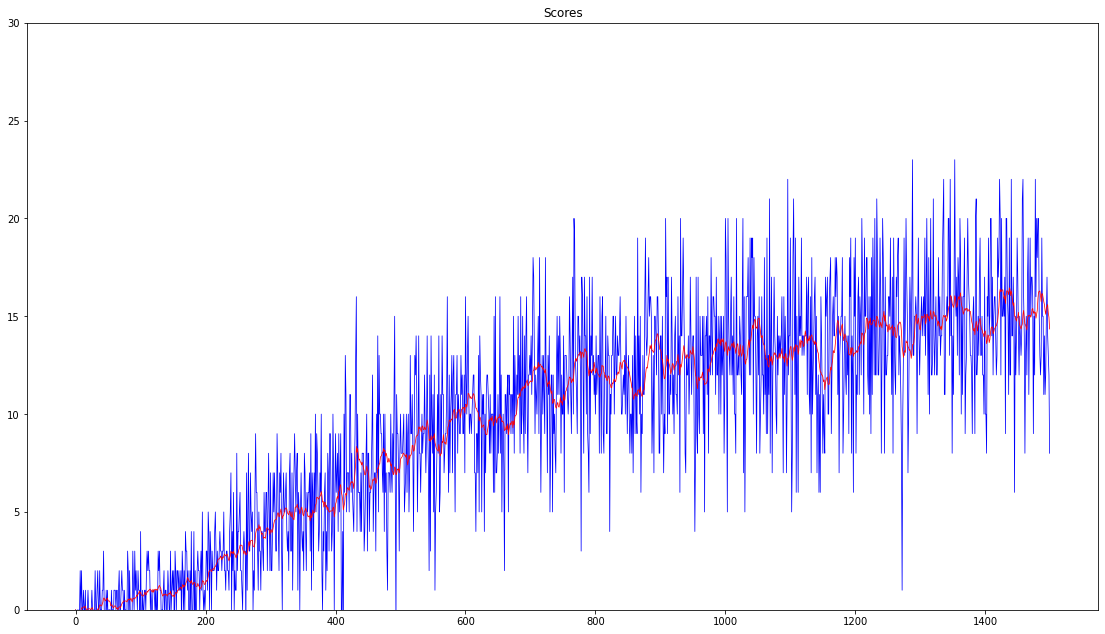

In [13]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

params = Params()

# Vanilla DQN
model_name = 'QNetwork'
agent = DQNagent(state_size=state_size, action_size=action_size, params=params, device=device)
agent.model_register(model_name)
scores = train_dqn(agent, n_episodes=1500)

filename = model_name + '.png'
plot_scores(scores=scores, filename=filename, rolling_window=20)

### Start Training: Double DQN

Episode 100	Average Score: 0.18
Episode 200	Average Score: 1.45
Episode 300	Average Score: 3.39
Episode 400	Average Score: 5.23
Episode 500	Average Score: 6.57
Episode 600	Average Score: 9.80
Episode 700	Average Score: 10.13
Episode 800	Average Score: 11.61
Episode 900	Average Score: 12.00
Episode 1000	Average Score: 12.32
Episode 1100	Average Score: 13.76
Episode 1200	Average Score: 13.97
Episode 1300	Average Score: 14.77
Episode 1400	Average Score: 15.74

Environment solved in 1300 episodes!	Average Score: 15.74
Episode 1500	Average Score: 15.39

Environment solved in 1400 episodes!	Average Score: 15.39


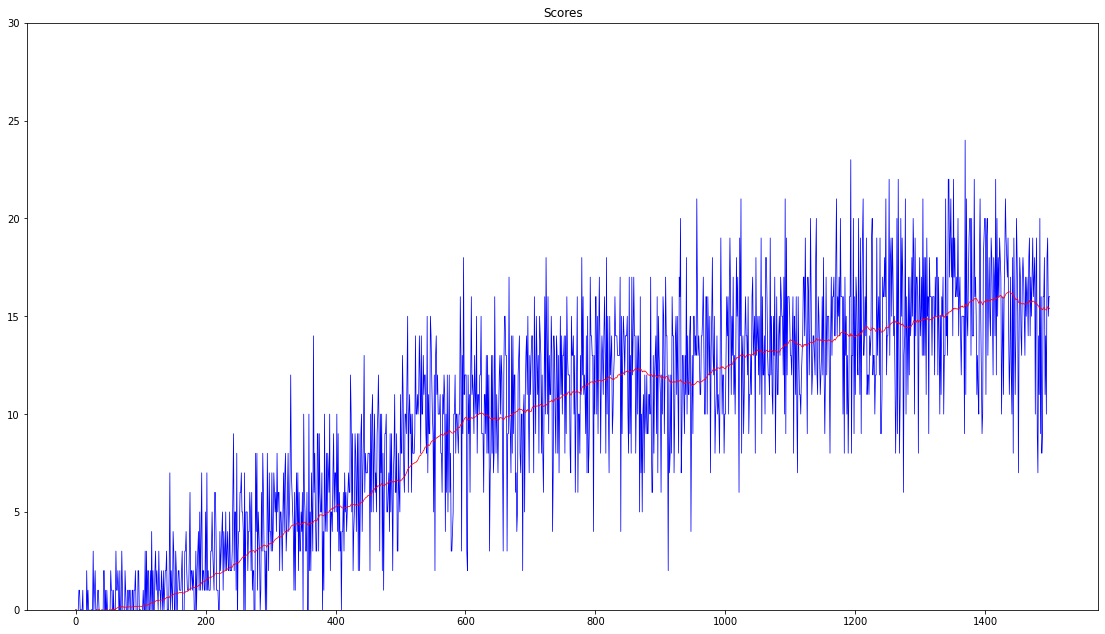

In [14]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

params = Params()

# Double DQN
model_name = 'QNetwork'
agent = DDQNagent(state_size=state_size, action_size=action_size, params=params, device=device)
agent.model_register(model_name)
scores = train_dqn(agent, n_episodes=1500)

filename = 'Double_' + model_name + '.png'
plot_scores(scores=scores, filename=filename)

### Start Training: Deuling DQN

Episode 100	Average Score: 0.06
Episode 200	Average Score: 1.63
Episode 300	Average Score: 3.23
Episode 400	Average Score: 5.21
Episode 500	Average Score: 6.58
Episode 600	Average Score: 8.36
Episode 700	Average Score: 10.54
Episode 800	Average Score: 11.90
Episode 900	Average Score: 12.61
Episode 1000	Average Score: 12.55
Episode 1100	Average Score: 12.79
Episode 1200	Average Score: 13.46
Episode 1300	Average Score: 14.40
Episode 1400	Average Score: 14.27
Episode 1500	Average Score: 14.54
Episode 1600	Average Score: 14.94
Episode 1700	Average Score: 14.59
Episode 1800	Average Score: 15.61

Environment solved in 1700 episodes!	Average Score: 15.61


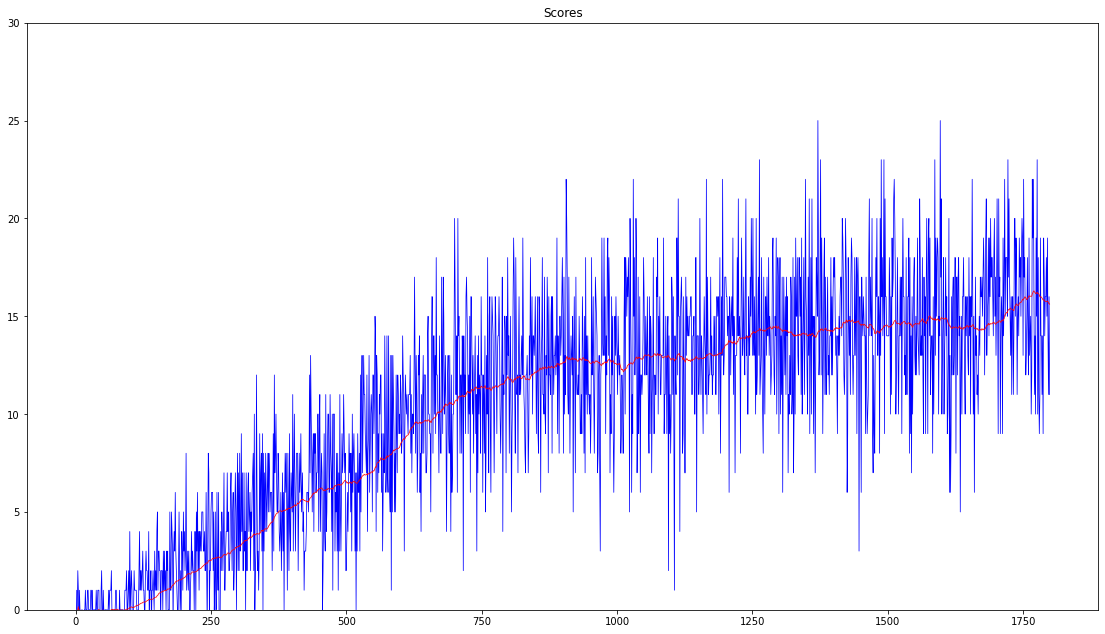

In [15]:
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")

params = Params()

# Deuling DQN
model_name = 'DeulingNetwork'
agent = DQNagent(state_size=state_size, action_size=action_size, params=params, device=device)
agent.model_register(model_name)
scores = train_dqn(agent, n_episodes=1800)

filename = model_name + '.png'
plot_scores(scores=scores, filename=filename)

## 5. Conclusion

From those graphs we can see three algorithms behaving well and expected. However, no significant improvements can be seen by additionally running Double DQN and Deuling. By qualitative evaluation(visualization), the author
stands with that the saturation has been probably achieved by vanilla DQN. It requires more explorations or switch to policy based methods for more
comparisons. 

### Future Work
- Prioritized Experience Replay